In [48]:
if (!require('forecast')) {
  install.packages('forecast')
  library('forecast')
} else {
  library('forecast')
}
if (!require('ggplot2')) {
  install.packages('ggplot2')
  library('ggplot2')
} else {
  library('ggplot2')
}
if (!require('devtools', character.only = TRUE)) {
  # Si no está instalada, instalarla
  install.packages('devtools')
  # Cargar la librería
  library('devtools', character.only = TRUE)
} else {
  # Si ya está instalada, cargar la librería
  library('devtools', character.only = TRUE)
}

if (!require('transformeR', character.only = TRUE)) {
  install_github('SantanderMetGroup/transformeR')
  library('transformeR', character.only = TRUE)
} else {
  library('transformeR', character.only = TRUE)
}


Loading required package: ggplot2



In [34]:
load('ba_grid_5.Rdata',verbose = TRUE)
load('df.series_grid_5.Rdata',verbose = TRUE)
load('df_grid_5.Rdata',verbose = TRUE)
df_grid_5 = df

Loading objects:
  ba.mergeGrid5
Loading objects:
  df.seriesTemporales_conCoords
Loading objects:
  df


Elijo los que píxeles que son más poblados (no tienen ni un solo cero) para que haya más datos y los pongo en un data frame

In [70]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (all(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}
df_sinCeros[1:5,]

,coord_x,coord_y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-157.5_17.5,-157.5,17.5,8.537555,167.94650,102.23748,0.9757182,70.78624,61.07549,330.5478,1047.7494,104.8866,112.5342,19.34492,63.88650
-157.5_22.5,-157.5,22.5,26.344468,62.69385,115.79825,125.6240955,71.29733,282.15175,590.1779,619.0135,560.5821,217.3675,84.84128,59.01965
-122.5_37.5,-122.5,37.5,618.755855,84.25837,69.27618,1708.4877364,2745.30994,7410.61160,17981.7212,43957.0369,32520.1744,26812.8418,20958.38060,2080.40000
-122.5_42.5,-122.5,42.5,531.036173,458.50596,730.13060,1335.3700182,1616.43042,3304.28220,30074.5662,80886.9974,67942.6008,16887.2475,5730.85188,901.86831
-122.5_47.5,-122.5,47.5,84.643805,10.00114,17.80690,160.9939682,547.53017,2987.60453,20544.7520,24790.5938,18111.7381,7964.0189,4827.75458,250.94613


ELijo un pixel cualquiera y lo represento tanto con estadísticas normales como con estadísticas circulares

,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
424,-122.5,47.5,1,1,8,NA,NA,8,0.7955231,0.9297576,0.7874562


Saving 6.67 x 6.67 in image


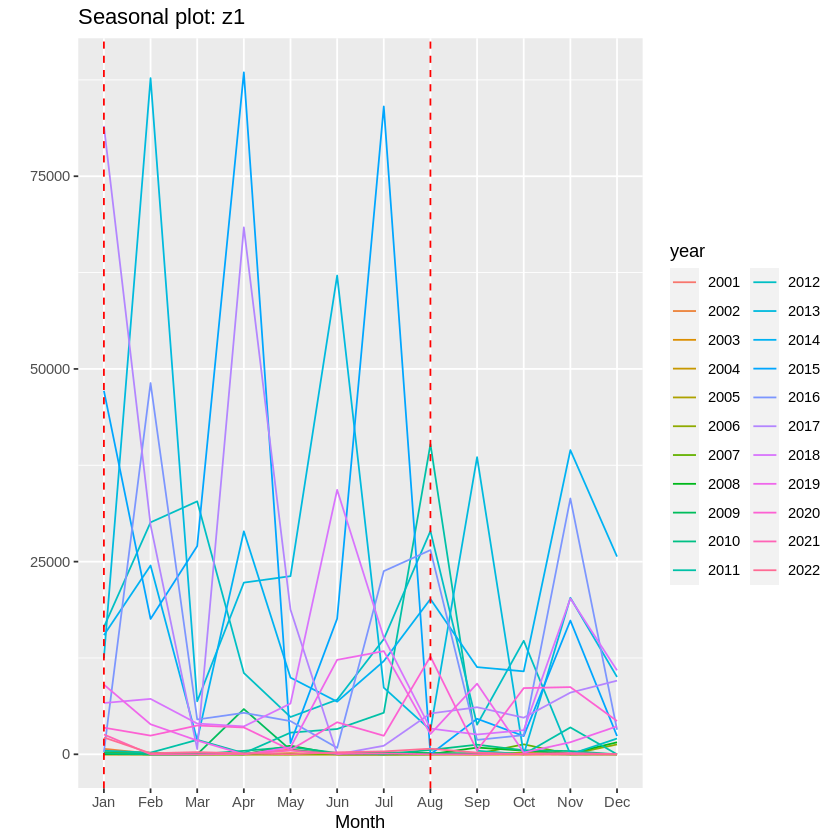

Saving 6.67 x 6.67 in image


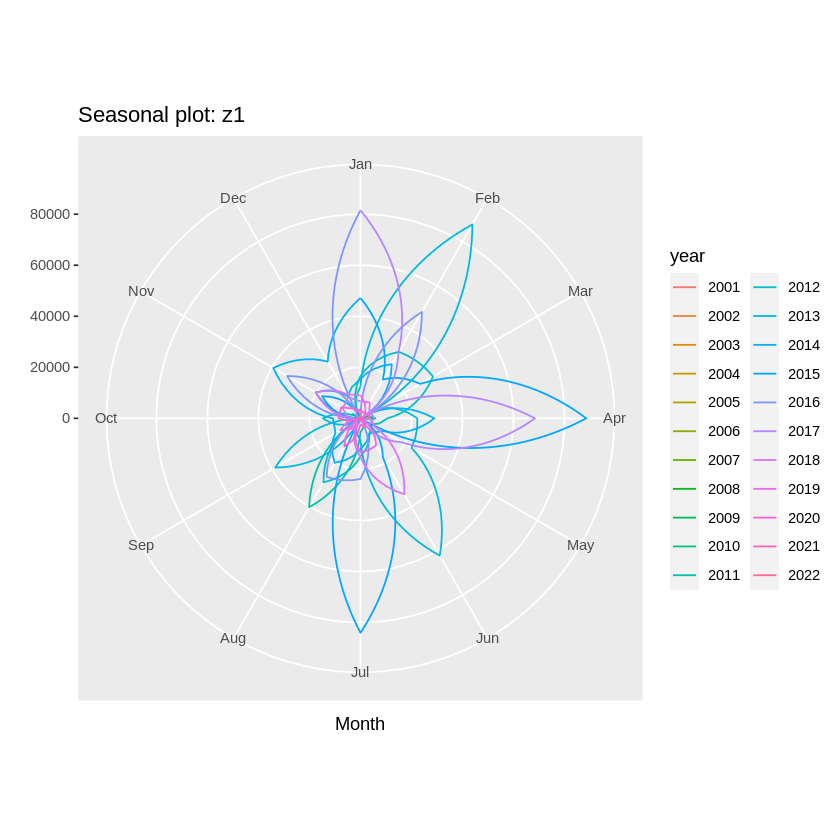

In [72]:
num_pixel = 5
x = df_sinCeros$'coord_x'[num_pixel]
y = df_sinCeros$'coord_y'[num_pixel]
df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]
fireSeassonStart <- df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]$main_fire_season_start
fireSeassonEnd <- df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]$main_fire_season_end

df <- data.frame()
for (year in 2001:2022){
    new_grid <- subsetGrid(grid = ba.mergeGrid5, year = year, lonLim  = x, latLim  = y)
    df <- rbind(df, new_grid$Data)
}
colnames(df) <- c(1:12)
rownames(df) <- c(2001:2022)

z = as.vector(unlist(df))
z1 <- ts(z, start=2001, frequency=12)
ggseasonplot(z1) +  geom_vline(xintercept = (fireSeassonStart - 1)/12, color="red",
                 linetype="dashed") +  geom_vline(xintercept = (fireSeassonEnd - 1)/12, color="red",
                 linetype="dashed")
ggsave(paste0('FireSeasson',x,'_',y,'.png'))
ggseasonplot(z1, polar=TRUE)
ggsave(paste0('FireSeasson_circ',x,'_',y,'.png'))

,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
460,-117.5,47.5,1,5,5,7,11,6,0.7726965,0.7338023,1.021844


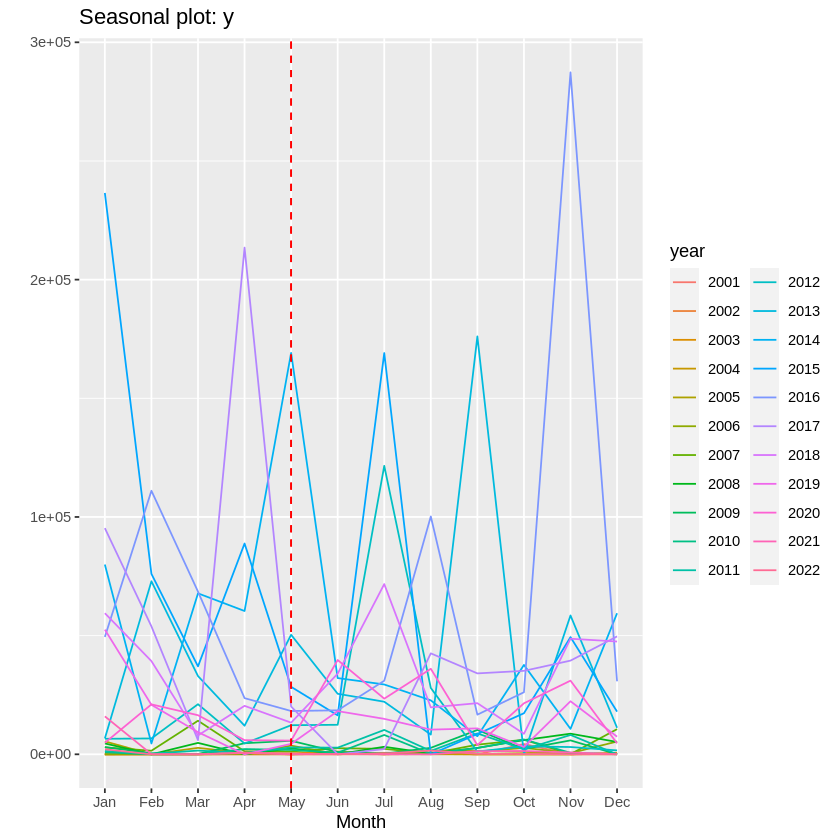

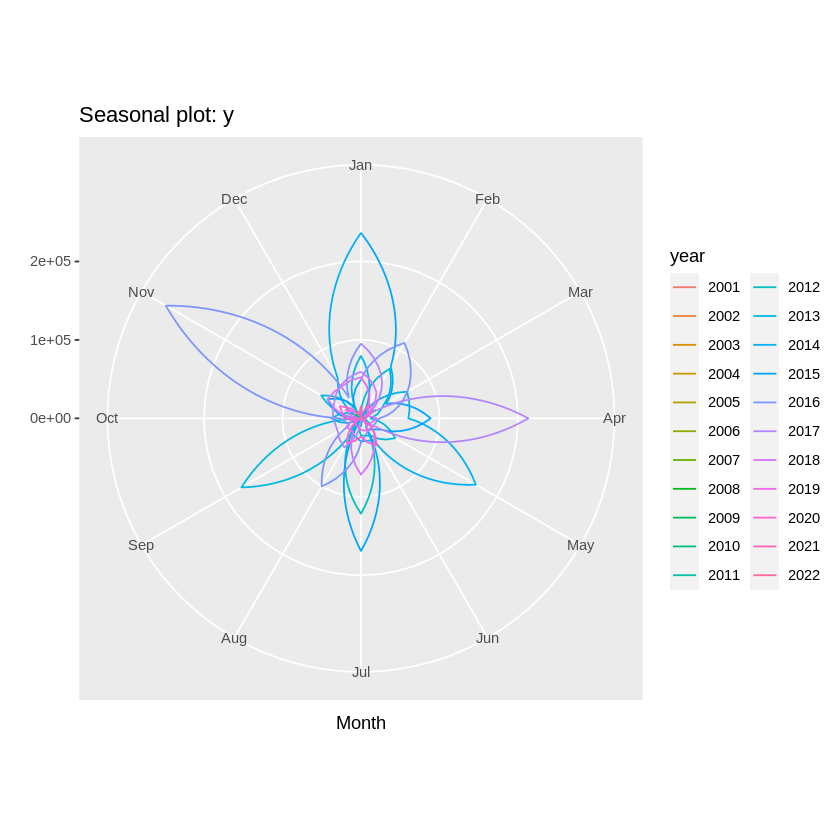

In [61]:
num_pixel = 10
x = df_sinCeros$'coord_x'[num_pixel]
y = df_sinCeros$'coord_y'[num_pixel]
df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]
fireSeassonStart <- df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]$main_fire_season_start
fireSeassonEnd <- df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]$main_fire_season_end

df <- data.frame()
for (year in 2001:2022){
    new_grid <- subsetGrid(grid = ba.mergeGrid5, year = year, lonLim  = x, latLim  = y)
    df <- rbind(df, new_grid$Data)
}
colnames(df) <- c(1:12)
rownames(df) <- c(2001:2022)

z = as.vector(unlist(df))
z1 <- ts(z, start=2001, frequency=12)
ggseasonplot(z1) +  geom_vline(xintercept = (fireSeassonStart - 1)/12, color="red",
                 linetype="dashed") +  geom_vline(xintercept = (fireSeassonEnd - 1)/12, color="red",
                 linetype="dashed")
ggseasonplot(z1, polar=TRUE)

Ahora prueblo acrear un data frame en donde sí que pueda haber ceros y que no estén tan poblados de datos

In [62]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (any(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}
df_sinCeros[1:5,]

,coord_x,coord_y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-177.5_67.5,-177.5,67.5,0,0,0,0,0.000000,0.2555429,70.275133,17.37712,5.110919,0,0,0
-172.5_62.5,-172.5,62.5,0,0,0,0,0.000000,3.5776429,0.000000,0.00000,0.000000,0,0,0
-172.5_67.5,-172.5,67.5,0,0,0,0,0.000000,137.7191810,2.236743,12.97067,0.000000,0,0,0
-167.5_52.5,-167.5,52.5,0,0,0,0,2.044367,0.0000000,0.000000,0.00000,0.000000,0,0,0
-167.5_62.5,-167.5,62.5,0,0,0,0,35.083319,15.5015381,0.000000,0.00000,0.000000,0,0,0


,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
166,-157.5,17.5,1,1,7,NA,NA,7,0.5838276,1.139154,0.02365903


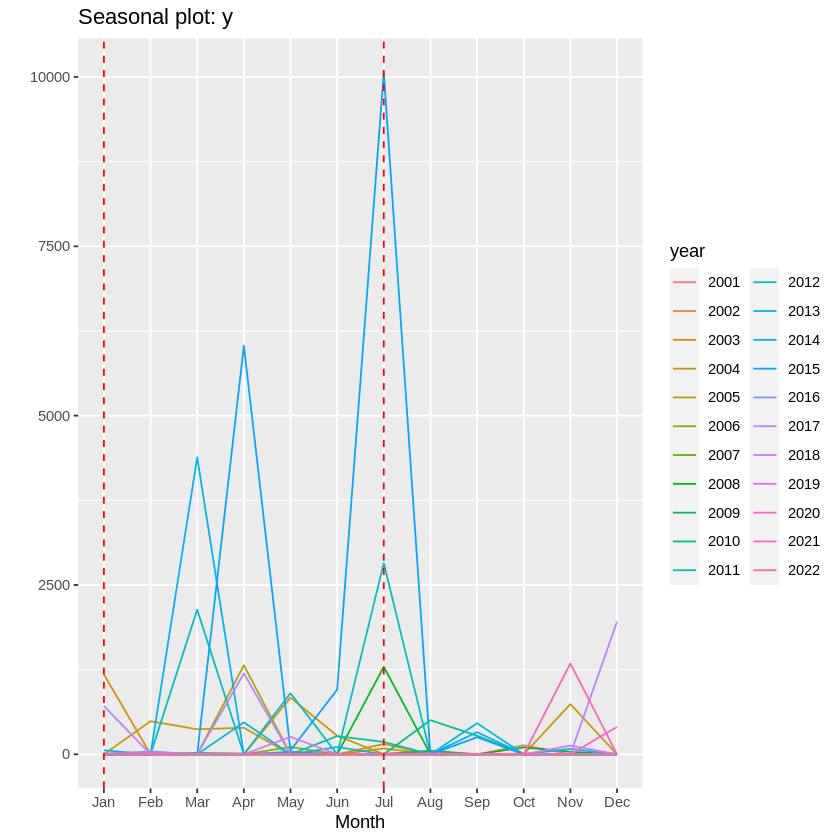

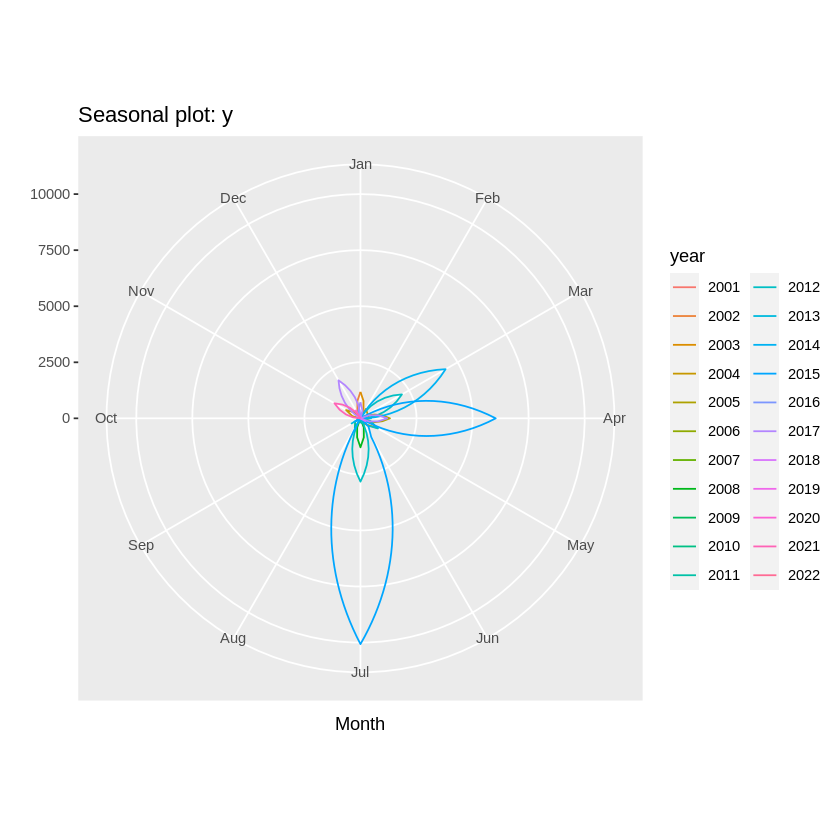

In [63]:
num_pixel = 10
x = df_sinCeros$'coord_x'[num_pixel]
y = df_sinCeros$'coord_y'[num_pixel]
df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]
fireSeassonStart <- df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]$main_fire_season_start
fireSeassonEnd <- df_grid_5[df_grid_5$coord_x == x & df_grid_5$coord_y == y, ]$main_fire_season_end

df <- data.frame()
for (year in 2001:2022){
    new_grid <- subsetGrid(grid = ba.mergeGrid5, year = year, lonLim  = x, latLim  = y)
    df <- rbind(df, new_grid$Data)
}
colnames(df) <- c(1:12)
rownames(df) <- c(2001:2022)

z = as.vector(unlist(df))
z1 <- ts(z, start=2001, frequency=12)
ggseasonplot(z1) +  geom_vline(xintercept = (fireSeassonStart - 1)/12, color="red",
                 linetype="dashed") +  geom_vline(xintercept = (fireSeassonEnd - 1)/12, color="red",
                 linetype="dashed")
ggseasonplot(z1, polar=TRUE)